In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
consumer_complaints = pd.read_csv("Consumer_Complaints.csv", low_memory=False)

In [93]:
# consumer_complaints.head()

In [94]:
# consumer_complaints.info()

In [7]:
consumer_complaints.index = pd.to_datetime(consumer_complaints.pop('Date received'), format="%m/%d/%Y")

In [95]:
# consumer_complaints.head()

In [96]:
# consumer_complaints.index.value_counts()

In [10]:
number_per_month = consumer_complaints.index.value_counts().resample("M", how=["sum"])

In [11]:
average_per_month = consumer_complaints.index.value_counts().resample("M")

In [97]:
# number_per_month

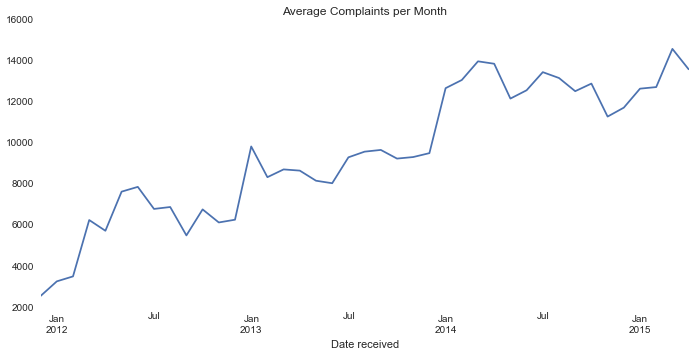

In [159]:
number_per_month[:-1].plot(legend=False) # exclude current month as it is still in progress
plt.subplots_adjust(left=2, right=3.5, top=3, bottom=2)
plt.title("Average Complaints per Month")
plt.show()

We see that there is an upward trend in the average number of complaints per month over the entire period.  This can likely be accounted for by increased usage of the Consumer Financial Protection Bureau over the years.

In [98]:
# consumer_complaints.Product.value_counts()

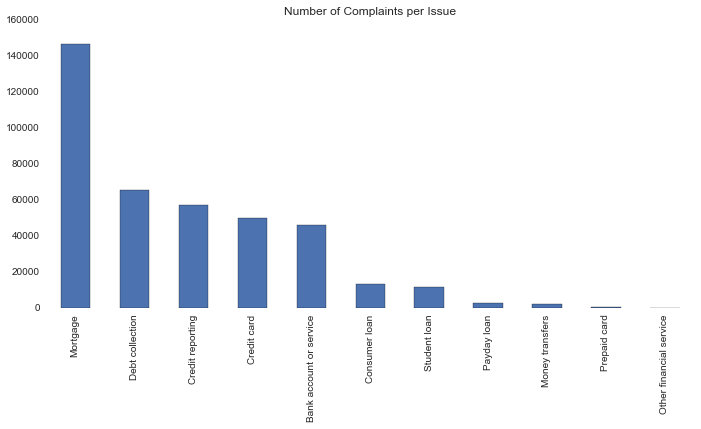

In [160]:
consumer_complaints.Product.value_counts().plot(kind="bar")
plt.title("Number of Complaints per Issue")
plt.subplots_adjust(left=2, right=3.5, top=3, bottom=2)
plt.show()

The breakdown of complaints by issue shows a clear leader in mortage issues. Given the often predatory nature of lending, this is not all that surprising. The next three highest issues all center around debt and credit, which are major concerns for a large number of americans and can often be confusing so it stands to reason that many issues are likely to arise for people.

In [16]:
by_company = consumer_complaints.Company.value_counts()[:10]

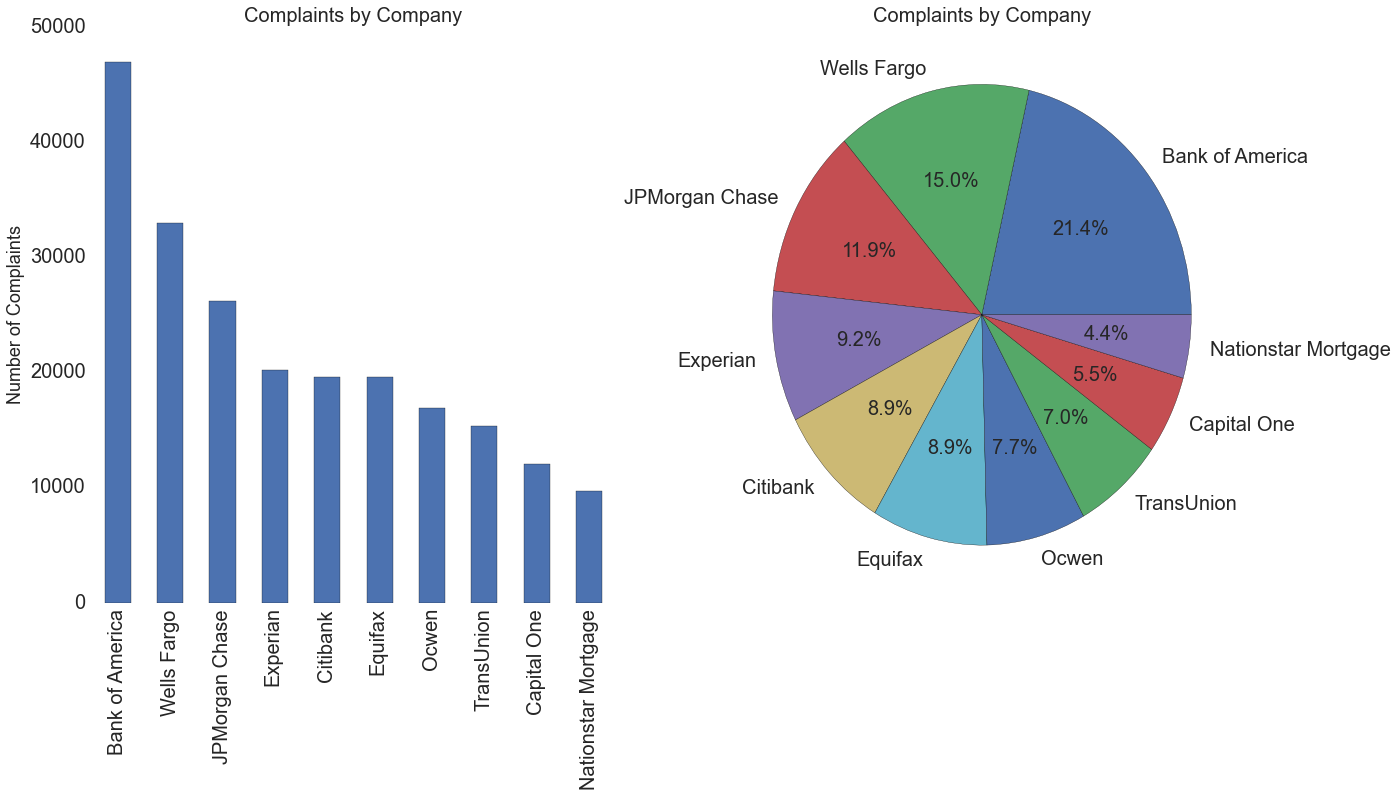

In [17]:
plt.subplot(121)
by_company.plot(kind="bar", figsize=(6,6), 
               fontsize=20)
plt.ylabel("Number of Complaints", fontsize=18)
plt.title("Complaints by Company", fontsize=20)


plt.subplot(122)
by_company.plot(kind="pie", figsize=(8,8), autopct='%.1f%%', fontsize=20)
plt.ylabel("")
plt.title("Complaints by Company", fontsize=20)

plt.subplots_adjust(left=2, right=4, top=3, bottom=2)
plt.show()

Nearly 50% of the complaints for the top 10 companies (by number of complaints) belong to Bank of America, Wells Fargo, and JPMorgan Chase.  Considering that these are three of the largest banks in the United States it is understandable that they would have a larger volume of complaints due to having larger numbers of customers, however given that some of the others, such as Citibank and Capital One, are also quite large it is entirely possible that Bank of America, Wells Fargo, and JPMorgan Chase receive an above average number of complaints.

In [18]:
by_response = consumer_complaints["Company response"].value_counts()

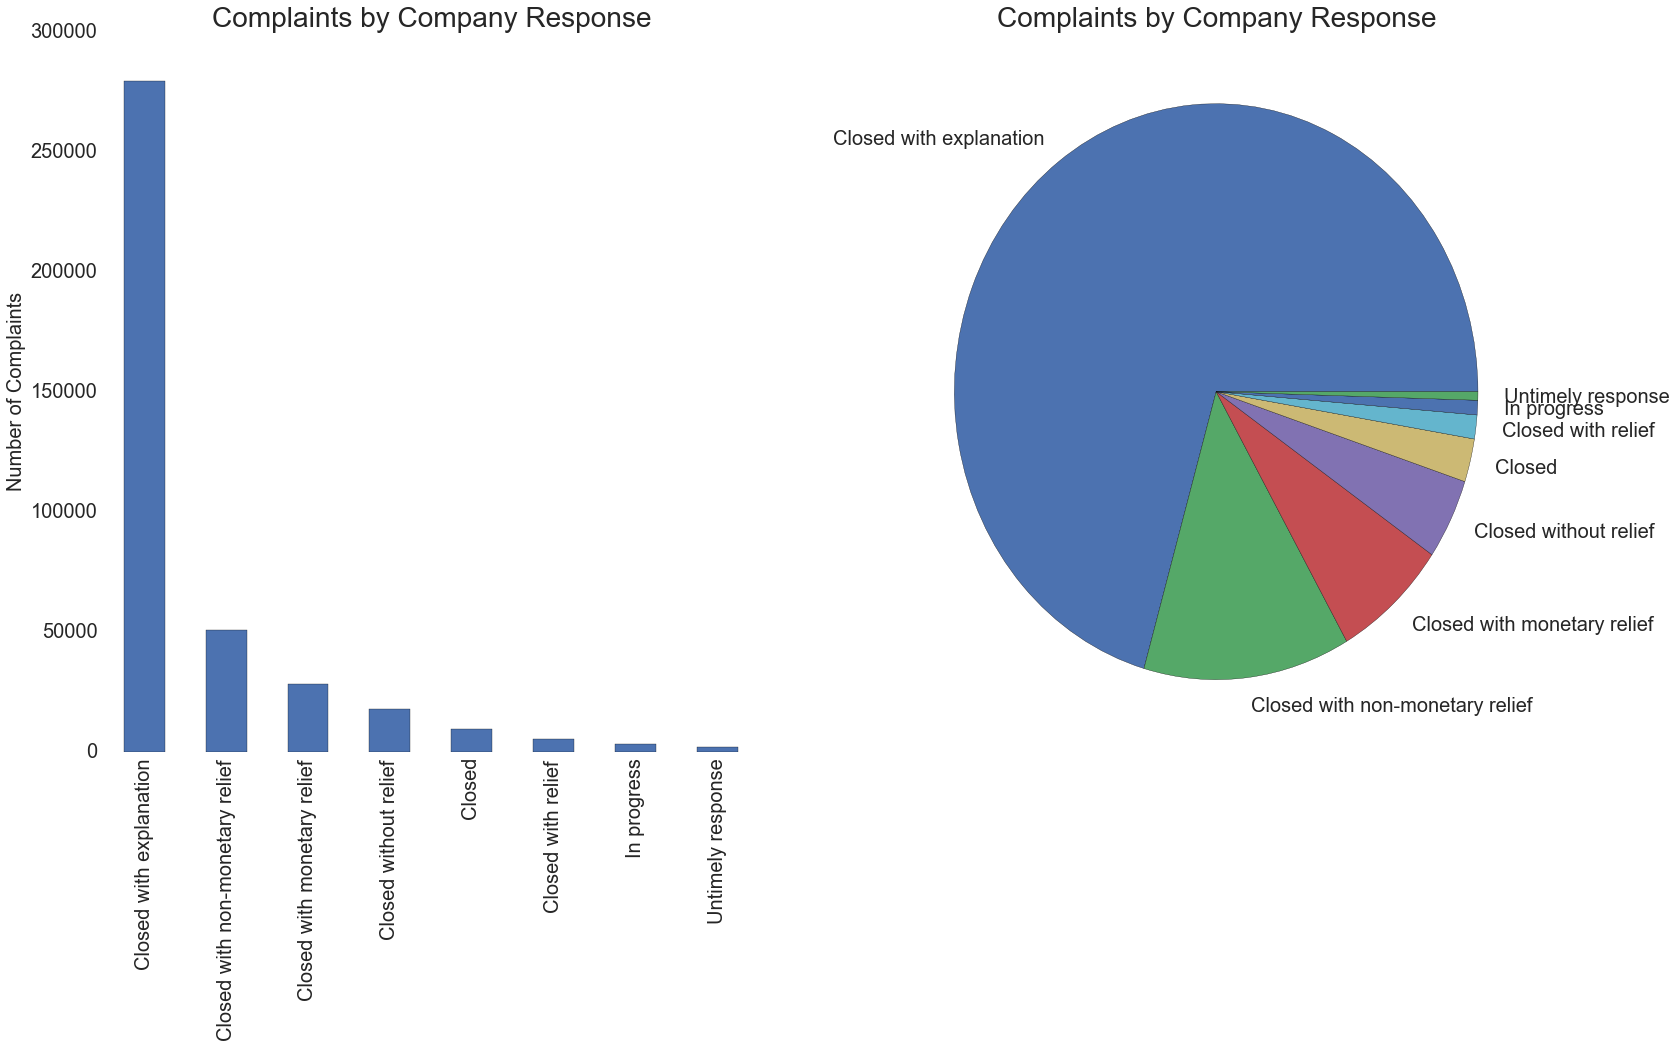

In [163]:
plt.subplot(121)
by_response.plot(kind="bar", figsize=(6,6), 
               fontsize=20)
plt.ylabel("Number of Complaints", fontsize=20)
plt.title("Complaints by Company Response", fontsize=28)


plt.subplot(122)
by_response.plot(kind="pie", figsize=(10,10), fontsize=20)
plt.ylabel("")
plt.title("Complaints by Company Response", fontsize=28)

plt.subplots_adjust(left=2, right=4, top=3, bottom=2)
plt.show()

Almost 75% of all complaints end up receiving an explanation in response from the company, with 21.2% of the remainder being closed with some form of relief given.  This is indicative of a high degree of success by the CFPB in eliciting helpful responses from companies on behalf of consumers.

In [20]:
consumer_complaints["Day of the week"] = consumer_complaints.index.to_series().map(lambda d: d.weekday())

In [21]:
by_DOW = consumer_complaints["Day of the week"].value_counts().sort_index()

In [22]:
days_of_week = ["Su", "M", "Tu", "W", "Th", "F", "Sa"]
by_DOW.index = days_of_week

In [139]:
number_days = consumer_complaints["Day of the week"].resample("D").value_counts()
number_days.index = days_of_week

In [140]:
mean_DOW = by_DOW / number_days

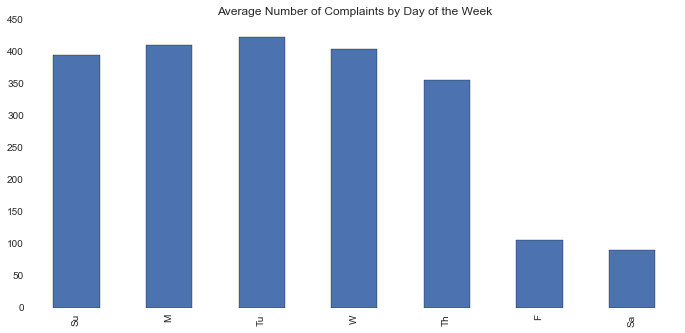

In [141]:
mean_DOW.plot(kind="bar")
plt.title("Average Number of Complaints by Day of the Week")
plt.subplots_adjust(left=2, right=3.5, top=3, bottom=2)
plt.show()

The most notable feature of the average number of complaints by day of the week is the substantial drop in submissions on Fridays and Saturdays. I was unable to find any specific data to support a position explaining this drop, but one might hypothesize that more people take Friday and Saturday off from even financial concerns than the other days of the week.

In [61]:
pop_data = pd.read_csv("pop_change.csv", header=2)

In [64]:
pop_data = pop_data.replace({'Maryland': 'MD', 'Michigan': 'MI', 'Rhode Island': 'RI', 'New Jersey': 'NJ', 'Tennessee': 'TN', 'American Samoa': 'AS', 'North Dakota': 'ND', 'Massachusetts': 'MA', 'New Hampshire': 'NH', 'Nebraska': 'NE', 'Indiana': 'IN', 'New Mexico': 'NM', 'Delaware': 'DE', 'Missouri': 'MO', 'Utah': 'UT', 'Arkansas': 'AR', 'Kansas': 'KS', 'Minnesota': 'MN', 'Alaska': 'AK', 'Ohio': 'OH', 'Illinois': 'IL', 'National': 'NA', 'New York': 'NY', 'District of Columbia': 'DC', 'Virginia': 'VA', 'South Dakota': 'SD', 'Virgin Islands': 'VI', 'Wisconsin': 'WI', 'Colorado': 'CO', 'Mississippi': 'MS', 'Pennsylvania': 'PA', 'Washington': 'WA', 'Hawaii': 'HI', 'Maine': 'ME', 'Iowa': 'IA', 'Texas': 'TX', 'Nevada': 'NV', 'Georgia': 'GA', 'Florida': 'FL', 'Northern Mariana Islands': 'MP', 'Montana': 'MT', 'West Virginia': 'WV', 'Kentucky': 'KY', 'Oregon': 'OR', 'North Carolina': 'NC', 'Arizona': 'AZ', 'Puerto Rico': 'PR', 'Oklahoma': 'OK', 'Guam': 'GU', 'Connecticut': 'CT', 'Vermont': 'VT', 'Alabama': 'AL', 'California': 'CA', 'Wyoming': 'WY', 'Idaho': 'ID', 'Louisiana': 'LA', 'South Carolina': 'SC'})

In [65]:
states_data = pop_data[5:]

In [66]:
states_data.index = states_data.pop("STATE_OR_REGION")

In [67]:
recent_states_data = states_data["2010_POPULATION"]

In [99]:
# recent_states_data

In [100]:
# consumer_complaints.State.value_counts().sort_index()

In [82]:
per_capita = consumer_complaints.State.value_counts().sort_index() / recent_states_data

In [88]:
per_capita = per_capita.dropna()

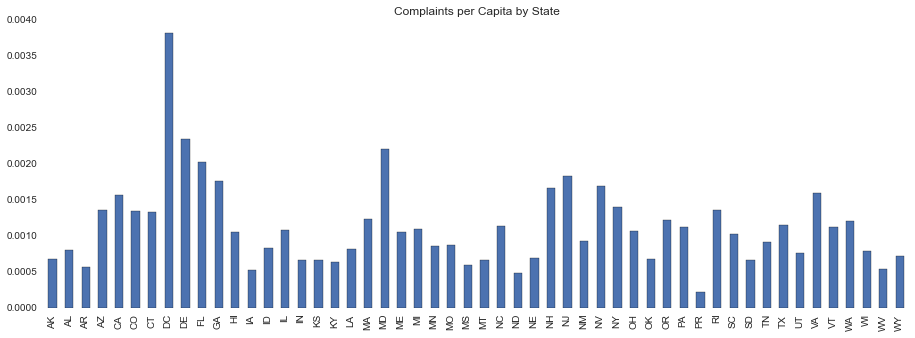

In [92]:
per_capita.plot(kind="bar")
plt.subplots_adjust(left=2, right=4, top=3, bottom=2)
plt.title("Complaints per Capita by State")
plt.show()

The pattern for per capita complaints by state is difficult to resolve since there are so many factors to consider.  One minor pattern that we can see is that many states/regions with lower populations, such as Delaware, Rhode Island, and most notably Washingtion DC, have relatively high per capita complaints.  Since they have lower populations, a smaller number of complaints naturally yields a higher per capita score.  There does seem to be something of a trend of states with higher population densities having higher per capita complaints as well.

In [150]:
consumer_complaints["ZIP code"].value_counts()

48382    916
33071    617
76116    368
33173    364
20744    296
20774    293
92626    287
92101    266
30349    251
11375    250
76028    250
20002    246
90046    245
32256    240
91730    239
75052    232
92660    228
30331    226
30044    225
30039    224
33409    222
30043    217
20772    212
30058    210
33411    209
20009    209
21117    203
33025    202
11230    199
33433    195
        ... 
29756      1
68313      1
76715      1
33636      1
33744      1
33642      1
99260      1
11110      1
77325      1
76651      1
33717      1
11120      1
33700      1
66549      1
99228      1
33689      1
33684      1
11133      1
76673      1
30552      1
76676      1
11141      1
99219      1
99213      1
23400      1
76701      1
33661      1
99185      1
99179      1
65534      1
dtype: int64

In [155]:
ZIP_mean = consumer_complaints["ZIP code"].value_counts().mean()

In [156]:
ZIP_stdev = consumer_complaints["ZIP code"].value_counts().std()

In [171]:
consumer_complaints.groupby(consumer_complaints['ZIP code']).count()

,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,Submitted via,Date sent to company,Company,Company response,Timely response?,Consumer disputed?,Day of the week
ZIP code,,,,,,,,,,,,,
1,1,1,0,1,0,0,1,1,1,1,1,1,1
2,1,1,0,1,0,0,1,1,1,1,1,1,1
5,1,1,0,1,1,1,1,1,1,1,1,1,1
8,1,1,1,1,0,0,1,1,1,1,1,1,1
9,1,1,0,1,1,1,1,1,1,1,1,1,1
10,10,10,9,10,3,1,10,10,10,10,10,10,10
11,6,6,3,6,2,1,6,6,6,6,6,5,6
12,2,2,1,2,0,0,2,2,2,2,2,2,2
14,2,2,2,2,1,0,2,2,2,2,2,2,2


In [173]:
# consumer_complaints["Submitted via"].value_counts().plot(kind="bar")
# plt.title("Number of complaints by Method of Submission")
# plt.subplots_adjust(left=2, right=4, top=3, bottom=2)
# plt.show()